In [4]:
import cv2
import numpy as np

# 1) Load two images
M1 = cv2.imread("image1.jpg", cv2.IMREAD_GRAYSCALE)
M2 = cv2.imread("image2.jpg", cv2.IMREAD_GRAYSCALE)

# Ensure same size
M1 = cv2.resize(M1, (300, 300))
M2 = cv2.resize(M2, (300, 300))

# 2) Compute pixel-wise difference
difference = M1 - M2

# 3) Absolute difference
out = np.abs(difference)

# 4) Display result
cv2.imshow("Input Image 1", M1)
cv2.imshow("Input Image 2", M2)
cv2.imshow("Absolute Difference Output", out)

cv2.waitKey(0)
cv2.destroyAllWindows()


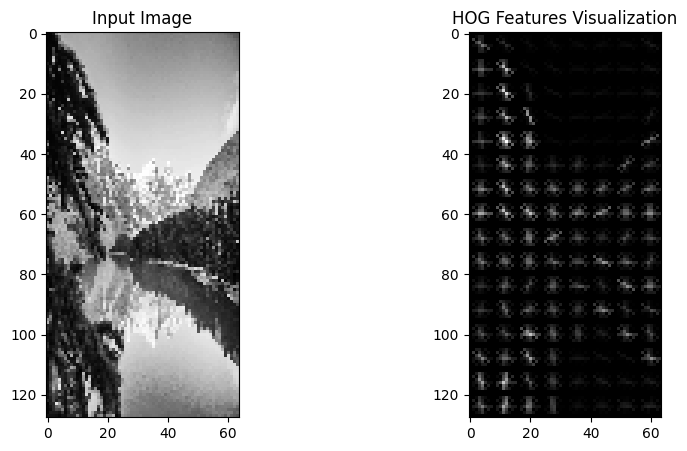

HOG Feature Vector Length: 3780


In [8]:
#pip install scikit-image

import cv2
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt

# --- Step 1: Preprocess (resize to 64x128) ---
img = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (64, 128))

# --- Step 2: Calculate Gradients (x and y) ---
Gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
Gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)

# --- Step 3: Magnitude and Orientation ---
magnitude = np.sqrt(Gx**2 + Gy**2)
orientation = np.arctan2(Gy, Gx) * (180 / np.pi) % 180  # [0,180)

# --- Step 4 & 5: HOG using skimage (internally does cell/block division & normalization) ---
features, hog_image = hog(
    img,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=True
)

# --- Step 6: Display ---
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('HOG Features Visualization')
plt.imshow(hog_image, cmap='gray')
plt.show()

print("HOG Feature Vector Length:", len(features))